## WORKING WITH CATEGORICAL DATA IN PYTHON

- A variable is considered "Categorical" if it contains a finite number of distict groups.
- It is also known as qualitative data

1) Ordinal Data:
- Categorical data that has a natural order

2) Nominal Data:
- Categorical Variables that cannot be placed into a natural order

- An "Object" Datatype is how pandas stores strings and is a good indicator that the data is a string



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

adult = pd.read_csv('Datasets/adult.csv')
print(adult.info())
print("\n")

# Exploring the marital status column in detail
print(adult["marital.status"].describe())
print("\n")
print(adult["marital.status"].value_counts())
# The output will contain RELATIVE FREQUENCIES if we set normalize = True
print("\n")
print(adult["marital.status"].value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


count                  32561
unique                     7
top       Married-civ-spouse

- Pandas uses "O" to represent the Object datatype

In [72]:
# Data types of each column
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [73]:
# Using the dtype property on the marital status column as we are working with a series and not a dataframe
print(adult["marital.status"].dtype)

# Converting it to the Categorcal data type
adult["marital.status"] = adult["marital.status"].astype("category")
print(adult["marital.status"].dtype)

object
category


In [74]:
# Creating a categorical series
my_data = ["A", "A", "C", "B", "C", "A"]

# METHIOD 1
myseries1 = pd.Series(my_data, dtype = "category")
print(myseries1)

# METHOD 2 - This method allows us to show that the categories hav a logical order
myseries2 = pd.Categorical(my_data, categories=["C", "B", "A"], ordered = True)
myseries2

0    A
1    A
2    C
3    B
4    C
5    A
dtype: category
Categories (3, object): ['A', 'B', 'C']


['A', 'A', 'C', 'B', 'C', 'A']
Categories (3, object): ['C' < 'B' < 'A']

### Why do we use categorical?

- MEMORY
- If we know the datatypes of the column before using it, then we should specify them
- Steps to specify dtypes when reading data:
1) Create a dictionary
2) Set the dtype parameter


In [75]:
# Memory used when stored as an object data type
adult = pd.read_csv('Datasets/adult.csv')
print(adult["marital.status"].nbytes)

# Memory used when stored as an categorical data type
adult["marital.status"] = adult["marital.status"].astype("category")
print(adult["marital.status"].nbytes)

260488
32617


In [76]:
# SPECIFYING DTYPES WHEN READING DATA

# 1)Create a dictionary
adult_dtypes = {"marital.status":"category"}

# 2) Set the dtype parameter
adult = pd.read_csv('Datasets/adult.csv', dtype=adult_dtypes)
adult["marital.status"].dtype

CategoricalDtype(categories=['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
                  'Married-spouse-absent', 'Never-married', 'Separated',
                  'Widowed'],
, ordered=False, categories_dtype=object)

### Grouping Data by Category

In [77]:
# using "by" parameter
groupby_object = adult.groupby("by = ['income']")

KeyError: "by = ['income']"

### Setting Category Variables

- 

In [ ]:
dogs = pd.read_csv("Datasets/ShelterDogs.csv")
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

### Setting Category Variables

- using the .cat accessor variable to access and manipulate the categories of the categorical variables

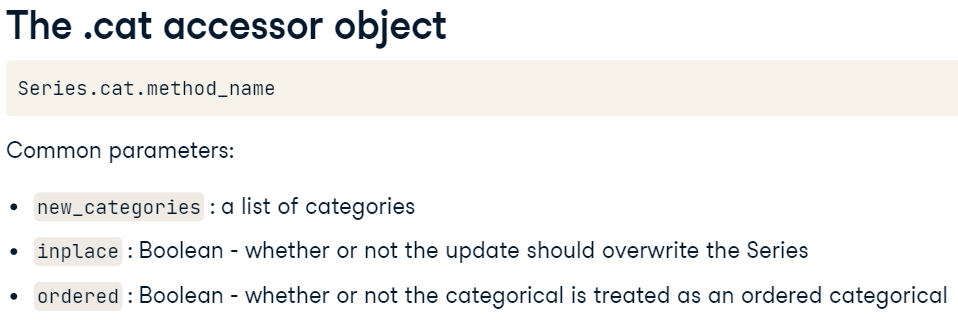



In [ ]:
# Converting the coat variable to category and checking its frequency distribution
dogs["coat"] = dogs["coat"].astype("category")
print(dogs["coat"].value_counts(dropna=False))
# cat.set_categories parameter is used to set specific categories
dogs["coat"] = dogs["coat"].cat.set_categories(new_categories=["short", "medium", "long"], ordered=True)
print(dogs["coat"].value_counts(dropna = False))
dogs['coat'].head(3)

coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64
coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64


0    short
1    short
2    short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [ ]:
# MISSING CATEGORIES

dogs['likes_people'].value_counts(dropna=False)

# Adding categoriess
dogs['likes_people'] = dogs['likes_people'].astype("category")
dogs['likes_people'] = dogs['likes_people'].cat.add_categories(new_categories=["did not check", "could not tell"])
print(dogs['likes_people'].cat.categories)

# Removing categories
dogs['likes_people'] = dogs['likes_people'].cat.remove_categories(removals=["wirehaired"])
print(dogs['likes_people'].cat.categories)


### Updating Categories

Common Replacement issues:
- must use new category names
- cannot collapse two categories into one using the rename_categories method

Collapsing Categories
- The .replace method does not preserve the categorical data type. The data type of the new column is an object data type and not category


In [83]:
# UPDATING CATEGORIES
dogs['breed'] = dogs['breed'].astype("category")
print(dogs['breed'].value_counts())

# Renaming categories
# Syntax: Series.cat.rename_categories(new_categories = dict)
# 1) make a dictionary
my_changes = {"Unknown Mix" : "Unknown"}
# 2) Rename the category
dogs['breed'] = dogs['breed'].cat.rename_categories(my_changes)
print("\n", dogs['breed'].value_counts())

# Renaming categories with a function
dogs['sex'] = dogs['sex'].astype("category")
dogs['sex'] = dogs['sex'].cat.rename_categories(lambda c:c.title())
print("\n", dogs['sex'].cat.categories)

# Collapsing categories
dogs['color'] = dogs['color'].astype("category")
print(dogs['color'].cat.categories)
# 1) craete a dictionary and use .replace 
update_colors = {
    "black and brown" : "black",
    "black and tan" : "black",
    "black and white" : "black"
}
dogs['main color'] = dogs['color'].replace(update_colors)
dogs['main color'] = dogs['main color'].astype("category")
dogs['main color'].cat.categories

breed
Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: count, Length: 277, dtype: int64

 breed
Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhoun

### Redordering Categories

- We may reorder the variables so that the analysis are displayed in a certain order


In [ ]:
# REORDERING VARIABLES
dogs['coat'] = dogs['coat'].cat.reorder_categories(new_categories=['short', 'medium', 'wirehaired', 'long'], ordered = True)
# Using the inplace method
dogs['coat'].cat.reorder_categories(new_categories=['short', 'medium', 'wirehaired', 'long'], ordered = True, inplace = True)

### Cleaning and accessing data

Possible Issues with Categorical Data:
1) inconsistent values:
- eg: "Ham", "ham", " Ham"
2) Mispelled values:
- eg: "hma", "Hma"
3) Wrong datatype for the column i.e. the column is not category data type

Identifying Issues:
- use either Series.cat.categories to see all categories or Series.value_counts()

In [84]:
# Identifying issues in categorical data
dogs['get_along_cats'].value_counts()

get_along_cats
yes    275
no     156
Name: count, dtype: int64

### Fixing Issues

1) Removing Whitespace
dogs['get_along_cats'] = dogs['get_along_cats'].str.strip()

2) Capitalization
dogs['get_along_cats'] = dogs['get_along_cats'].str.title()


3) Mispelled Words
- fixing with .replace
- The column will be converted to an object datatype

In [ ]:
# 1) Removing Whitespace
dogs['get_along_cats'] = dogs['get_along_cats'].str.strip()

# 2) Capitalization
dogs['get_along_cats'] = dogs['get_along_cats'].str.title()

# 3) Mispelled Words
replace_map = {"Noo" : "No"}
dogs['get_along_cats'].replace(replace_map, inplace=True)
dogs['get_along_cats'] = dogs['get_along_cats'].astype('category')

### Using the str accessor object

- Searching for a string

In [87]:
# Searching for a string
# We set the regex(regular expression) to false so that we use string matching and not regular expression
dogs['breed'].str.contains("Shepherd", regex = False)

# Accessing data with loc
dogs.loc[dogs['get_along_cats'] == "Yes", "size"].value_counts(sort = False)

Series([], Name: count, dtype: int64)